# Part I - Prosper Load Data Exploration
## by Kenneth Odoh

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.

The purpose of this project is to evaluate this loan data so as to:
- Gain deeper insight into audience behaviour
- Understudy what factors affect roan repayment

We shall restrict this analysis to only variables of interest in this dataset.
These variables of interest are as defined below:

|Variable | Description |
|:----------:|:-------------:|
|Var 1 | Desc 1 |
|Var 2 | Desc 2 |
|Var 3 | Desc 3 |

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [72]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import gridspec
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [73]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Preliminary Cleanup

In [75]:
#Replace Listing Category number with the appropriate value as given in the dictionary below, then convert to categorical datatype.
listing_cat_remap = {
    0: 'Not Available', 1 : 'Debt Consolidation', 2: 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use',
    6: 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 
    11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 
    16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'
              }

df['ListingCategory'] = df['ListingCategory (numeric)'].map(listing_cat_remap).astype('category')
df.drop(columns=['ListingCategory (numeric)'])

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Not Available
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Home Improvement
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Not Available
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Motorcycle
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Home Improvement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Debt Consolidation
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,Other
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,Debt Consolidation
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,Home Improvement


In [76]:
#Let's combine all PastDue Categories into one base category 'PastDue' (without the deliquency bucket) in order to obtain a cleaner chart.
# Let's also rename 'FinalPaymentInProgress' to 'Final Payment'

remap_cat_dict = {'Completed': 'Completed', 'Current':'Current', 'Cancelled': 'Cancelled', 'Defaulted': 'Defaulted',
             'Chargedoff': 'Chargedoff', 'FinalPaymentInProgress': 'Final Payment', 
              'Past Due (1-15 days)': 'Past Due', 'Past Due (16-30 days)': 'Past Due', 'Past Due (31-60 days)': 'Past Due',
              'Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)': 'Past Due', 'Past Due (>120 days)': 'Past Due',
             }
df['LoanStatus'] = df.LoanStatus.map(remap_cat_dict)

In [77]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'Final Payment'], dtype=object)

In [78]:
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [79]:
#For the IncomeRange column, Let's replace all unspecified values (e.g 'Not employed', 'Not displayed') with 'Not Specified' since that sounds more logical.
df['IncomeRange'].replace('Not employed', 'Not specified', inplace=True)
df['IncomeRange'].replace('Not displayed', 'Not specified', inplace=True)

In [80]:
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not specified', '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

In [81]:
#Some variables are better treated as ordered categorical variables since they follow some logical order.
#Let's convert them to ordered categorical variables

ordered_cat_dict = {
    'Term':[12, 36, 60],
    'EmploymentStatus': ['Self-employed', 'Full-time', 'Employed', 'Part-time', 'Retired', 'Not employed', 'Other', 'Not available'],
    'LoanStatus': ['Completed', 'Final Payment', 'Current', 'Past Due', 'Cancelled', 'Defaulted', 'Chargedoff', ],
    'IncomeRange':['Not specified', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',]
}

for var in ordered_cat_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordered_cat_dict[var])
    df[var] = df[var].astype(ordered_var)
    

#Other unordered categorical data
unordered_cat_list = ['BorrowerState', 'ListingCategory']
for var in unordered_cat_list:
    df[var] = df[var].astype('category')

In [82]:
#Let's clean up the missing values: replace all NaN with 'Not Available' so that they can be used in our plots
df.EmploymentStatus = df.EmploymentStatus.fillna('Not available')
df.EmploymentStatus.value_counts(dropna=False)

Employed         67322
Full-time        26355
Not available     7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [83]:
df[df.EstimatedLoss > df.EstimatedReturn].head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,20,Home Improvement
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1,Debt Consolidation
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,NaN,36,Defaulted,2012-12-19 00:00:00,0.35797,0.3177,0.3077,...,0.0,3790.25,3790.25,0.0,1.0,0,0,0.0,10,Household Expenses
19,0FFC35866018516621B0D3F,875565,2013-08-21 06:49:02.093000000,NaN,60,Current,NaN,0.24754,0.2225,0.2125,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1,Debt Consolidation
22,101735700321773921526BF,706927,2013-01-30 09:36:13.783000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,94,Debt Consolidation


In [84]:
df.IncomeRange.unique()

['$25,000-49,999', '$50,000-74,999', 'Not specified', '$100,000+', '$75,000-99,999', '$1-24,999', '$0']
Categories (7, object): ['Not specified' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

In [85]:
df.Recommendations.sort_values(ascending=True).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 14, 16, 18, 19, 21, 24, 39],
      dtype=int64)

In [86]:
df.IncomeVerifiable.value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

In [87]:
df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [88]:
df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

### What is the structure of your dataset?

- The dataset consists of 81 variables
- The Dataset is predominantly numeric in nature

### What is/are the main feature(s) of interest in your dataset?

- I am highly interested in evaluating debtor profiles (including some imported, binding information such as credit score, employment status, financial standing, etc), and how they affect credit repayment status. These data will help us dig deeper to gain more insights about the debtors, their credibility and other information that will help in either approving or denying furture loan requests.

- I am also interested in evaluating the current status of the lender. We can go beyond basic explorations into studying what percentage of the business capital has gone in bad debt, what percentage is recoverable, total estimated loss, total estimated profits, etc.

Thus, this analysis will be appropriately distributed between `AUDIENCE INSIGHT` (debtors -related) and `BUSINESS STATUS` (lender - related).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For this analysis, we shall be working with the following variables:
Loan term, Loan status, Employment status, Income Verifyiability status, Total principal borrowed, Income range, Recommendation and Home Owner status of the debtors. I expect that some of these factors are likely to influence debt repayment. 

There are also other variables such as Estimated Loss and Estimated Profit. These variables can help us evaluate if the business is still in profit, or headed for liquidation if nothing is changed. 

### Questions For Investigation

#### 1. What factors influence loan repayability?
- How does individual factors like employment status, income, credit rating, where they come from, etc. influence loan repayability?
- How does loan repayment correlate with the principal borrowed? Do high-principal borrowers pay up more than low-principal borrowers?

#### 2. What are the survival chances for the business?
- With the current state of things, will the business be able to keep up? What needs to be changed?
- How much percentage of the business asset has been lost in bad debt? How much not?
- Is the business really profiting or losing?
- What factors should the business look into when considering a loan request?

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [175]:
# Define helpful Functions and default parameters
palette_list = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']
# for palette in palette_list:
dark = sb.color_palette(palette='dark')
deep = sb.color_palette(palette='deep')
pastel = sb.color_palette(palette='pastel')
color_blind = sb.color_palette(palette='colorblind')
font = {'family': 'Arial',
       'weight': 'normal',
       'size': 14,
       }

plt.rc('font', **font)

In [176]:
df.Term.value_counts().sort_index(ascending=True).values

array([ 1614, 87778, 24545], dtype=int64)

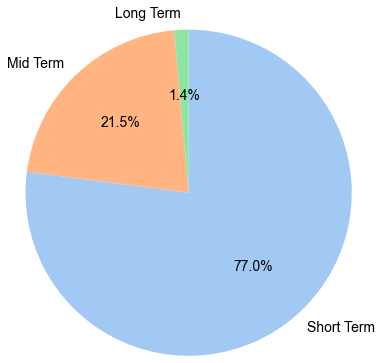

In [193]:
#Loan distribution by loan term
labels = {12 : 'Short Term', 30 : 'Mid Term', 60 : 'Long Term'}
plt.figure(figsize=(5,5),)
plot_pie = plt.pie(x=df.Term.value_counts(), 
        startangle=90, counterclock=False, 
        labels=labels.values(), radius=1.5, colors=pastel, autopct = "%1.1f%%",
                  explode=);

We can see  that __Mid Term__ loan (30 months maximum) is the predominant loan type

In [123]:
print(df.LoanStatus.unique())

['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff', 'Cancelled', 'Final Payment']
Categories (7, object): ['Completed' < 'Final Payment' < 'Current' < 'Past Due' < 'Cancelled' < 'Defaulted' < 'Chargedoff']


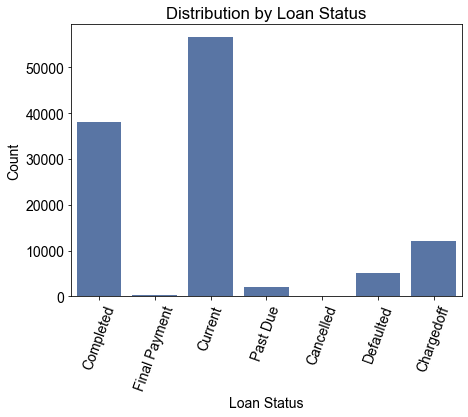

In [124]:
#Distribution by Loan Status
plt.figure(figsize=(7,5))
plot = sb.barplot(data=df, x=df.LoanStatus.value_counts().keys(), y=df.LoanStatus.value_counts(), color=deep[0], );
plot.set(title='Distribution by Loan Status', xlabel='Loan Status',ylabel='Count',)
plt.xticks(rotation=70);
# print('Hi')

Observation: Debtors with loan status __Current__ form the majority, followed by those who have __Completed__ their payment.
This could be a sign of hope for the business. __Current__ debts with higher recoverability are still in circulation than bad debts (ChargedOff, Defaulted)

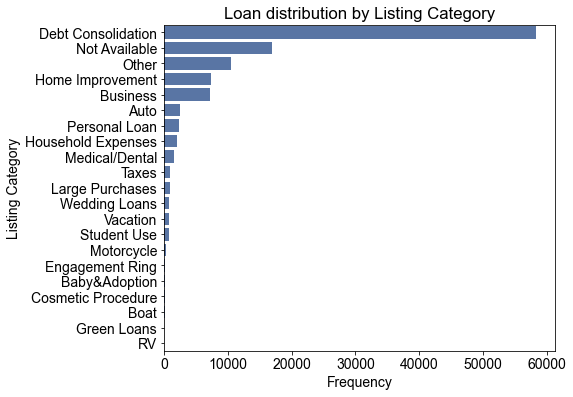

In [128]:
#Loan distribution by Listing Category
figure = plt.figure(figsize=(7,6))
plot = sb.barplot(data=df, y=df.ListingCategory.value_counts().index, x=df.ListingCategory.value_counts().values,
                  order=df.ListingCategory.value_counts().index,
                  orient='h',
               color=deep[0])
plt.title('Loan distribution by Listing Category')
plt.xlabel('Frequency')
plt.ylabel('Listing Category');

__Observation__: As shown above, the majority of borrowers selected __Debt Consolidation__ as their reason for borrowing.

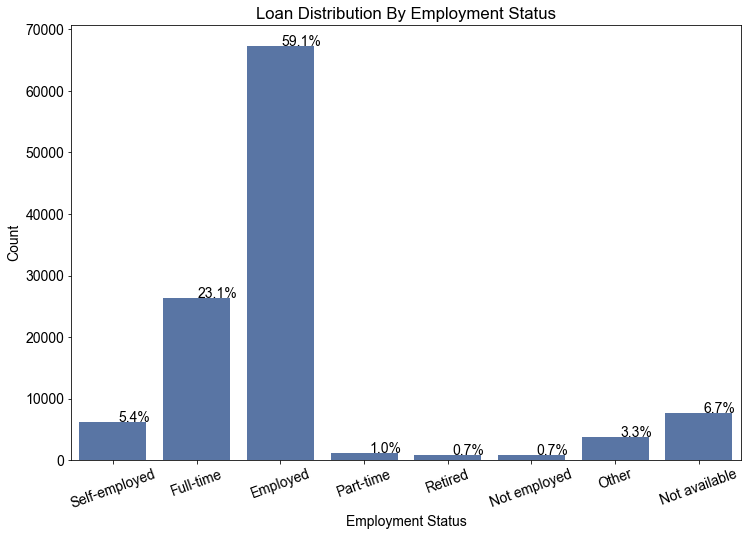

In [129]:
total_borrowings = float(len(df.EmploymentStatus))
figure = plt.figure(figsize=(12,8))
plot = sb.barplot(data=df, x=df.EmploymentStatus.value_counts().index, y=df.EmploymentStatus.value_counts().values, color=deep[0], )
plt.title('Loan Distribution By Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=20)

for p in plot.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total_borrowings)
    x = (p.get_x() + p.get_width()) - 0.15
    y = p.get_height() - 0.15
    plot.annotate(percentage, (x,y), ha = 'center')

__Observation__: 87.6% of debtors are at least, Employed. Lending to people with an established source of income is a sign of hope that they are more likely to pay back!

Now, let's dig deeper. Among those who have completed there payments, which category in the Employment Status is predominant?

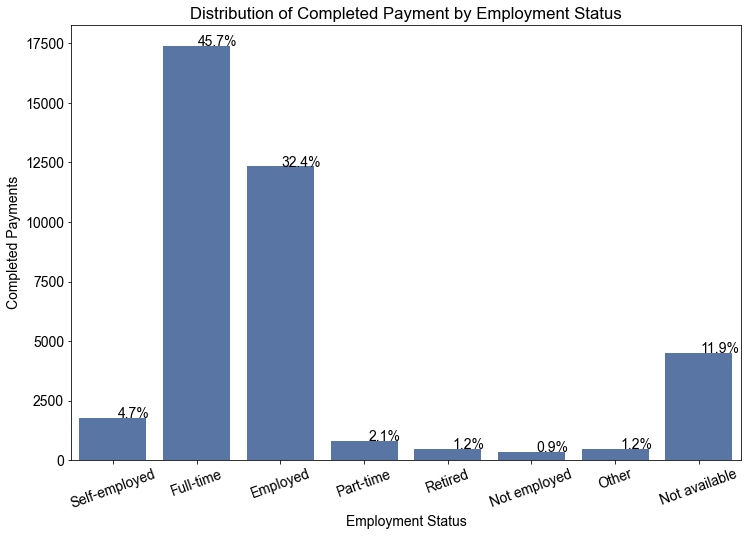

In [130]:
#Distribution of completed payment by Employment status

# A table for only those that have completed their payments
df_completed = df[df.LoanStatus == 'Completed']


total_completed = float(len(df_completed.LoanStatus))
figure = plt.figure(figsize=(12,8))
plot = sb.barplot(data=df_completed, x=df_completed.EmploymentStatus.value_counts().index, y=df_completed.EmploymentStatus.value_counts().values, color=deep[0], )
plt.title('Distribution of Completed Payment by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Completed Payments')
plt.xticks(rotation=20)

for p in plot.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total_completed)
    x = (p.get_x() + p.get_width()) - 0.15
    y = p.get_height() - 0.15
    plot.annotate(percentage, (x,y), ha = 'center')

__Observation__: Again, we can confirm that __82.8%__ of all completed payments were done by those who are at least, __Employed__

Now, numbers could mislead us. Given that the majority of borrowers are at least, __Employed__, let's look at the proportions. Let's see how each category of debtors is complying with debt repayment, relative to total number of debtors in that category. This will help us see if lack of source of income (perhaps because they are unemployed), could be a factor to make one not to repay their debt.

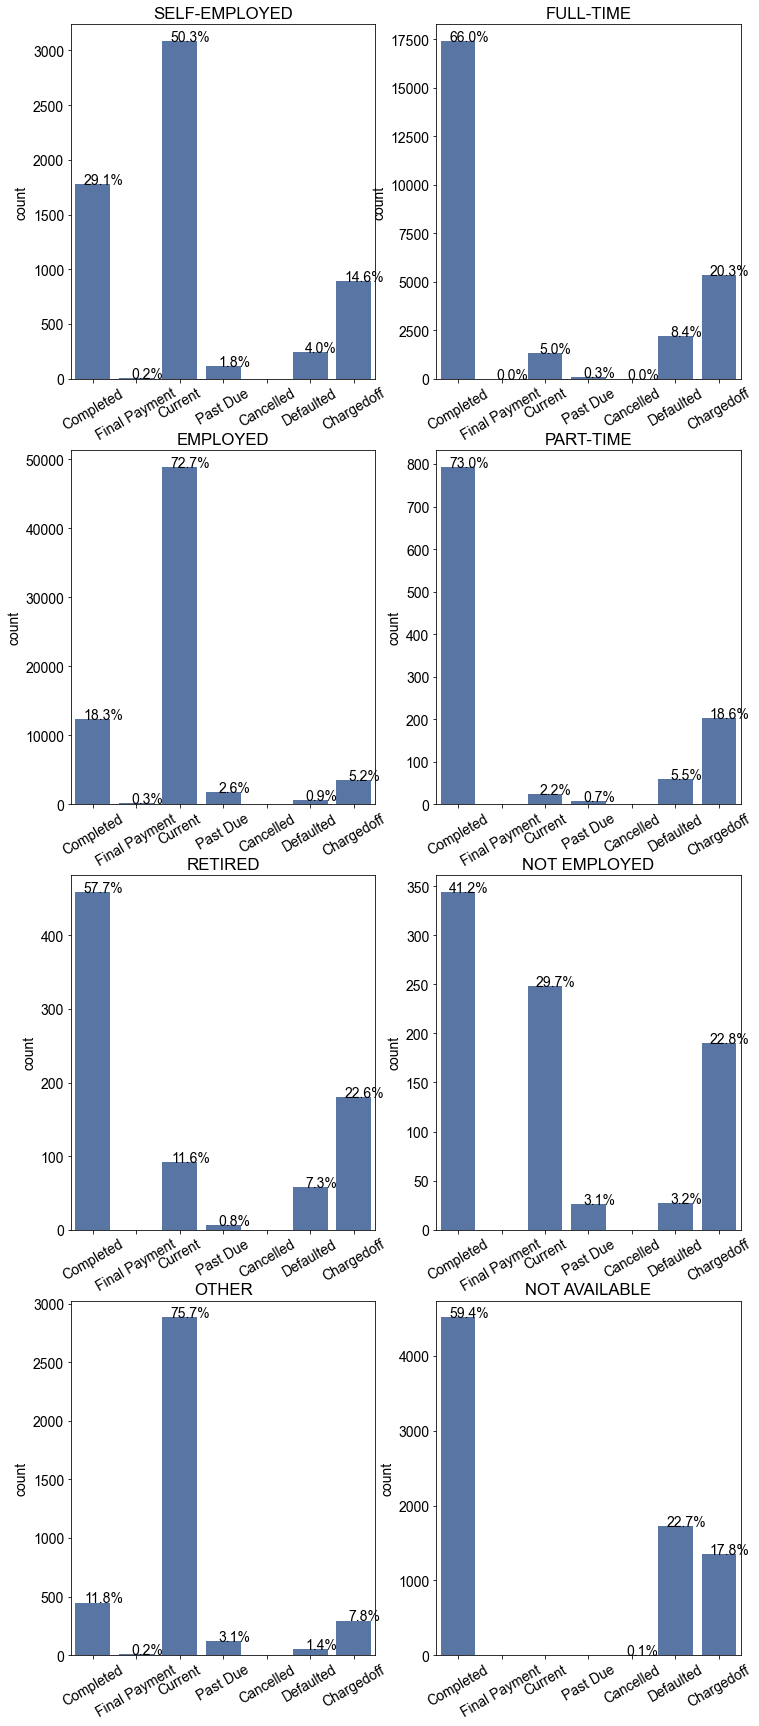

In [131]:
total_plots = len(df.EmploymentStatus.dtype.categories)
num_of_cols = 2

num_of_rows = total_plots // num_of_cols
if total_plots % num_of_cols !=0:
    num_of_rows +=1
    

position = range(1, total_plots + 1)

fig = plt.figure(figsize=(12,30))

my_list = list(df.EmploymentStatus.dtype.categories)

for i in my_list:
    ax = fig.add_subplot(num_of_rows, num_of_cols, position[my_list.index(i)],)
    data = df[df.EmploymentStatus == i]
    x = data['LoanStatus']
    plot = sb.countplot(data=data, x=x, color=deep[0])
    plt.title(i.upper())
    plt.xticks(rotation=30)
    plt.xlabel(None)
    
    #Computing the percentages
    total = data['LoanStatus'].value_counts().sum()
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100*p.get_height()/total)
        x = (p.get_x() + p.get_width()) - 0.15
        y = p.get_height() - 0.15
        plot.annotate(percentage, (x,y), ha = 'center')

__Observation__: Here, we can see that there is a high compliance with loan repayment across all Employment Status categories.

- Part-time workers showed the highest loan repayment at __73%__
- Those in the category of __OTHER__ showed the least compliance at 11.8%

However, about __40.5%__  of those with unknown Employment status (__Not Available__) have either __Defaulted__ or __Charged off__ debt. 

People who did not indicate their employment status are probably unsincere, and very likely not to clear their debt. Thus, further scrutiny should be put in place when considering future loan request for people in that category.

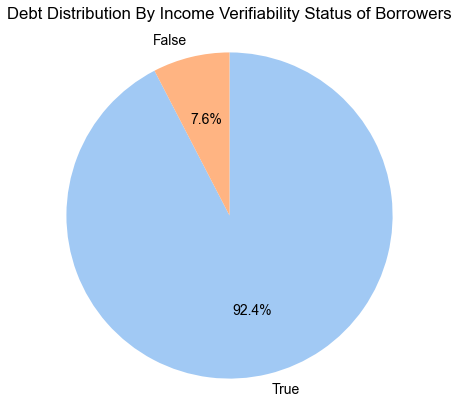

In [189]:
#Loan Verifiability
labels = {True : 'Verifiable', False : 'Not Verifiable'}
fig = plt.figure(figsize=(5,5))
plot = plt.pie(x=df.IncomeVerifiable.value_counts(), startangle=90, counterclock=False, radius=1.5, colors=pastel,
                  labels = labels, autopct = "%1.1f%%")
plt.title('Debt Distribution By Income Verifiability Status of Borrowers', y=1.2);

__Observation__: Those with Verifiable Income Status are the predominant population

In [168]:
sb.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

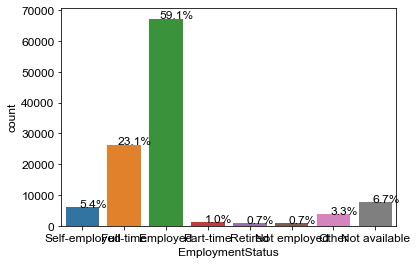

In [195]:
# to_list = list(df.EmploymentStatus.dtype.categories)
# for i in to_list:
total_completed = df.EmploymentStatus.value_counts().sum()
plot = sb.countplot(data=df, x='EmploymentStatus')
for p in plot.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total_completed)
    x = (p.get_x() + p.get_width()) - 0.15
    y = p.get_height() - 0.15
    plot.annotate(percentage, (x,y), ha = 'center')

Distribution of Completed Payment by Employment Status


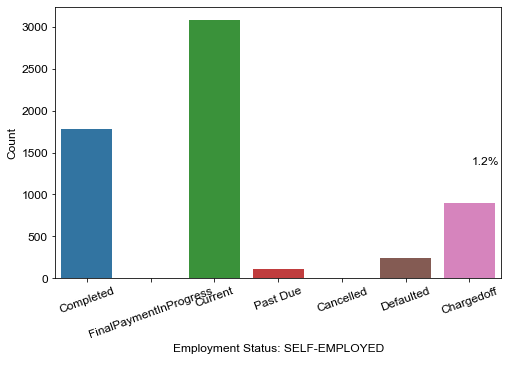

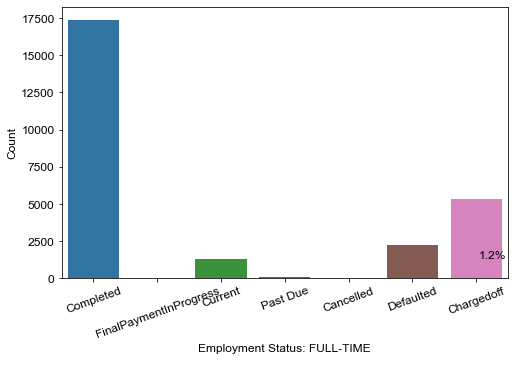

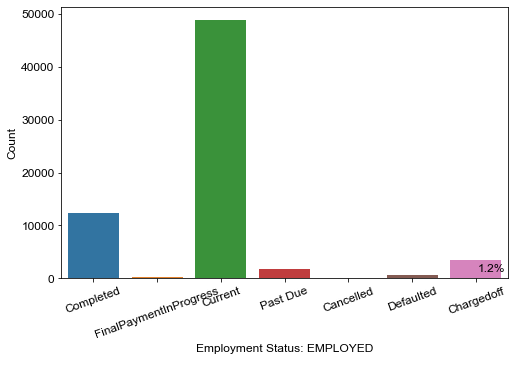

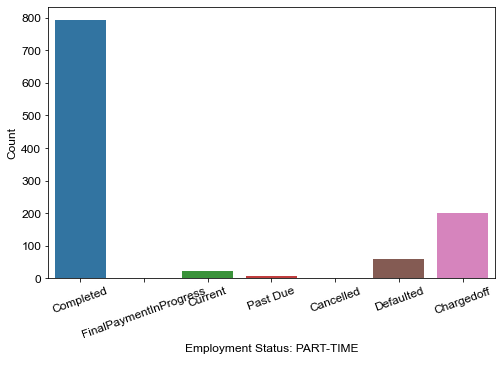

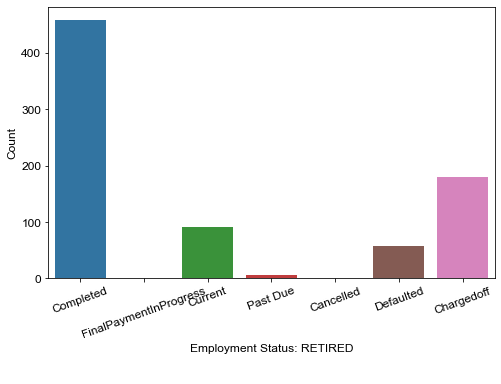

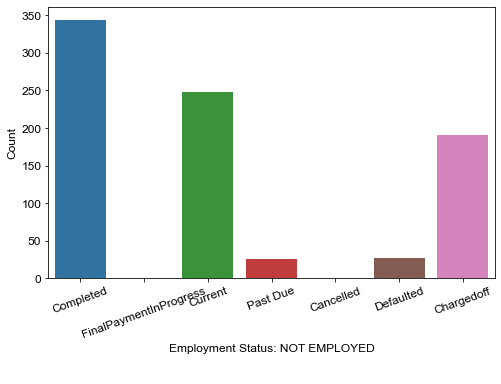

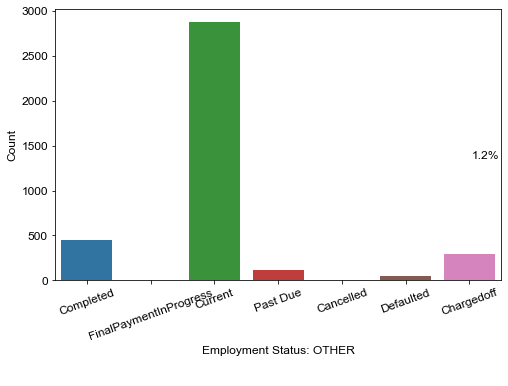

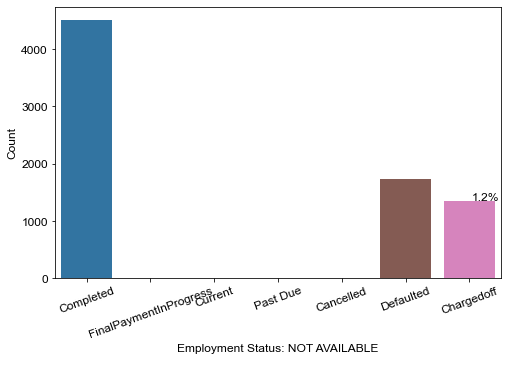

In [208]:
my_list = list(df.EmploymentStatus.dtype.categories)
print('Distribution of Completed Payment by Employment Status')
for i in my_list:
    plt.figure(figsize=(8,5))
    data = df[df.EmploymentStatus == i]
    x = data['LoanStatus']
    plot = sb.countplot(data=data, x=x)
#     plt.title(i.upper())
    plt.xlabel('Employment Status: {}\n\n'.format(i.upper()))
    plt.ylabel('Count')
    plt.xticks(rotation=20)

    percentage = '{:.1f}%'.format(100*p.get_height()/total_completed)
    x = (p.get_x() + p.get_width()) - 0.15
    y = p.get_height() - 0.15
    plot.annotate(percentage, (x,y), ha = 'center')

    
# total_completed = df.LoanStatus.value_counts().sum()
# plot = sb.countplot(data=df, x='LoanStatus')
# for p in plot.patches:
#     percentage = '{:.1f}%'.format(100*p.get_height()/total_completed)
#     x = (p.get_x() + p.get_width()) - 0.15
#     y = p.get_height() - 0.15
#     plot.annotate(percentage, (x,y), ha = 'center')



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [171]:
df.EmploymentStatus.dtype.categories[1]

'Full-time'

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

